In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v4'

# label load

In [3]:
train_X = pd.read_excel('./data/all_10_random_12000_262_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/all_10_random_12000_262_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/all_10_random_12000_262_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2798, 262)
(932, 262)
(932, 262)


# Residual autoencoder

In [7]:
encoding_dim = 4

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(128, activation='relu')(encoded_1)

residual_1 = layers.Dense(128)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 residual ###
encoded_4 = layers.Dense(64, activation='relu')(dropout_1)
encoded_5 = layers.Dense(32, activation='relu')(encoded_4)

residual_2 = layers.Dense(32)(dropout_1)
encoded_6 = layers.add([encoded_5, residual_2])
dropout_2 = layers.Dropout(0.2)(encoded_6)

### encoder 3 residual ###
encoded_7 = layers.Dense(16, activation='relu')(dropout_2)
encoded_8 = layers.Dense(8, activation='relu')(encoded_7)

residual_3 = layers.Dense(8)(dropout_2)
encoded_9 = layers.add([encoded_8, residual_3])


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_9)


### decoder 1 residual ###
decoded_1 = layers.Dense(8, activation='relu')(latent_space)
decoded_2 = layers.Dense(16, activation='relu')(decoded_1)

residual_5 = layers.Dense(16)(latent_space)
decoded_3 = layers.add([decoded_2, residual_5])

### decoder 2 residual ###
decoded_4 = layers.Dense(32, activation='relu')(decoded_3)
decoded_5 = layers.Dense(64, activation='relu')(decoded_4)

residual_6 = layers.Dense(64)(decoded_3)
decoded_6 = layers.add([decoded_5, residual_6])

### decoder 3 residual ###
decoded_7 = layers.Dense(128, activation='relu')(decoded_6)
decoded_8 = layers.Dense(256, activation='relu')(decoded_7)

residual_7 = layers.Dense(256)(decoded_6)
decoded_9 = layers.add([decoded_8, residual_7])

### output ###
decoded_10 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_9)



autoencoder = keras.Model(input_label, decoded_10)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

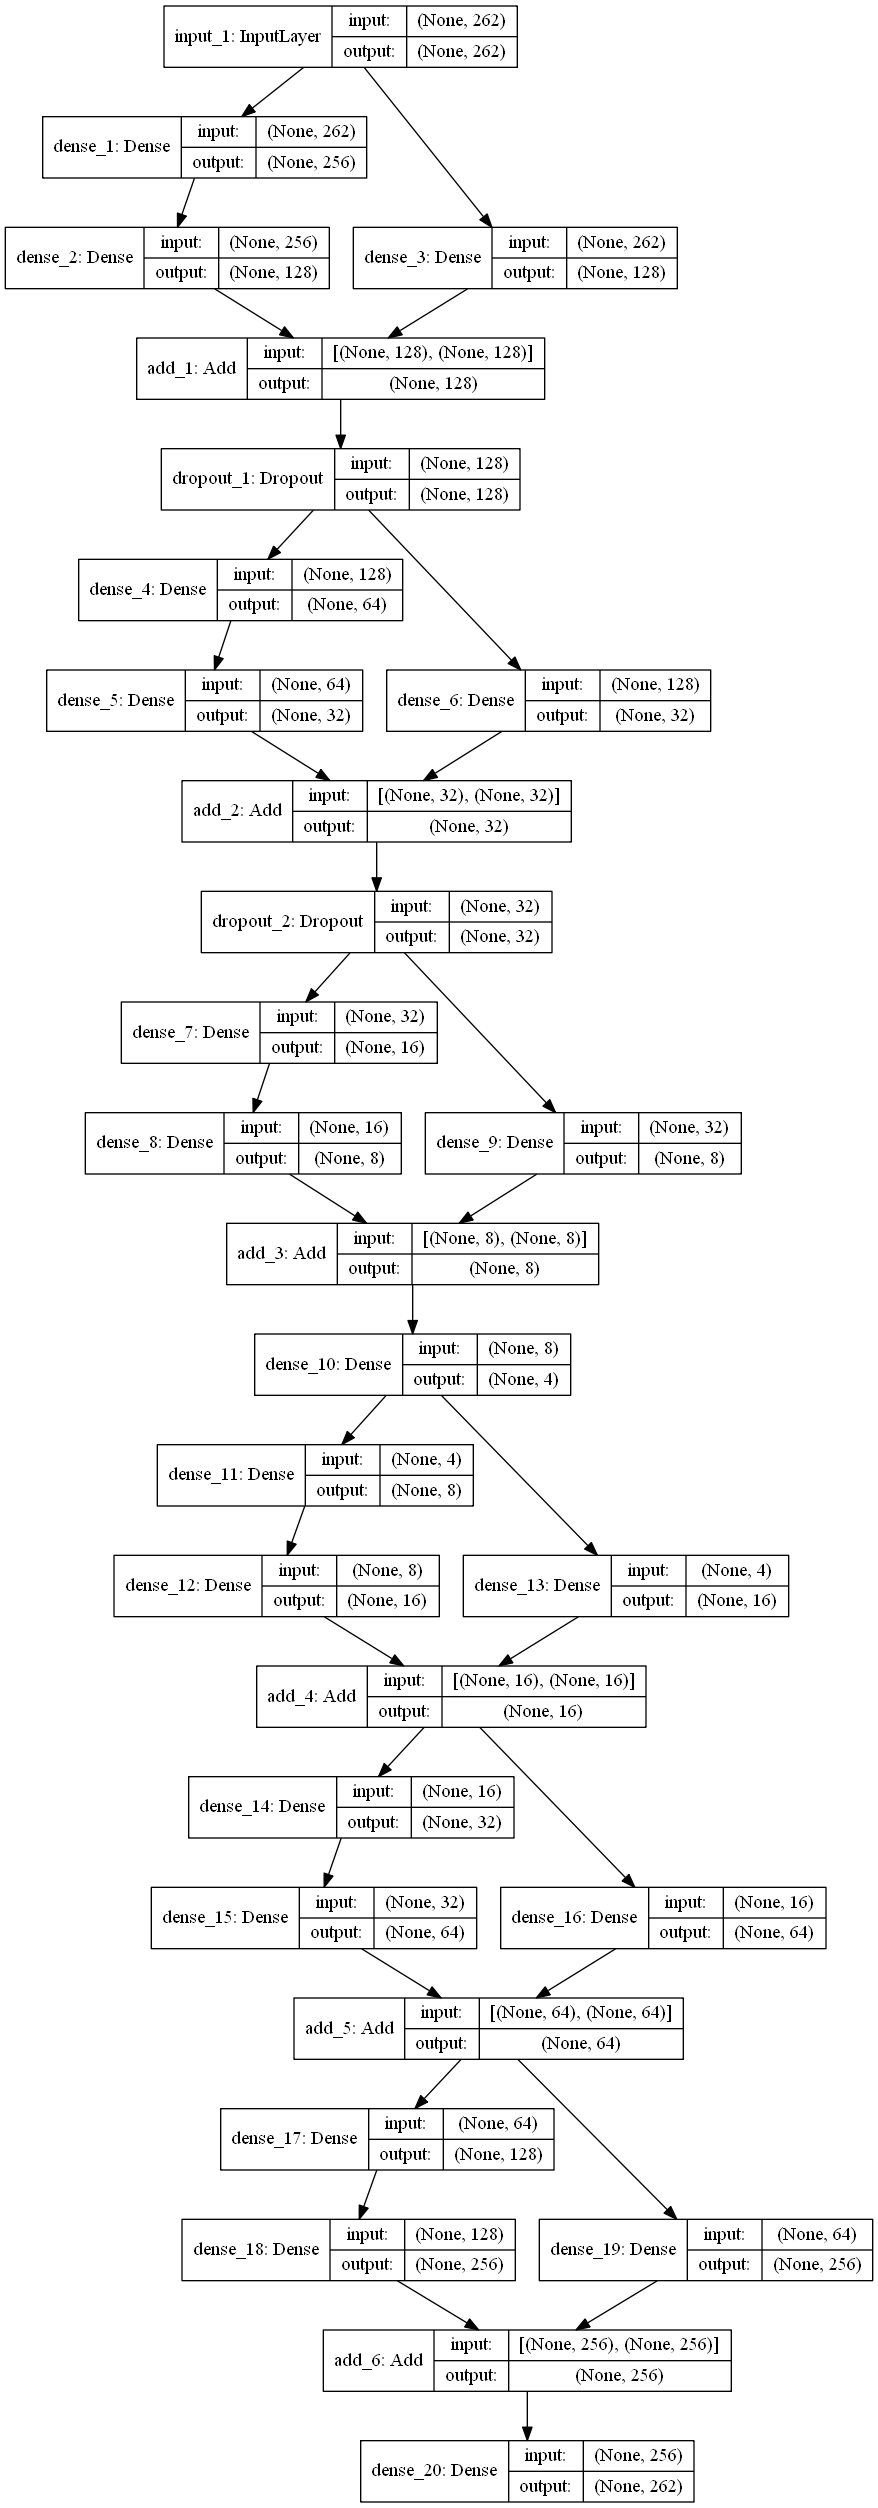

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_extra_all_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

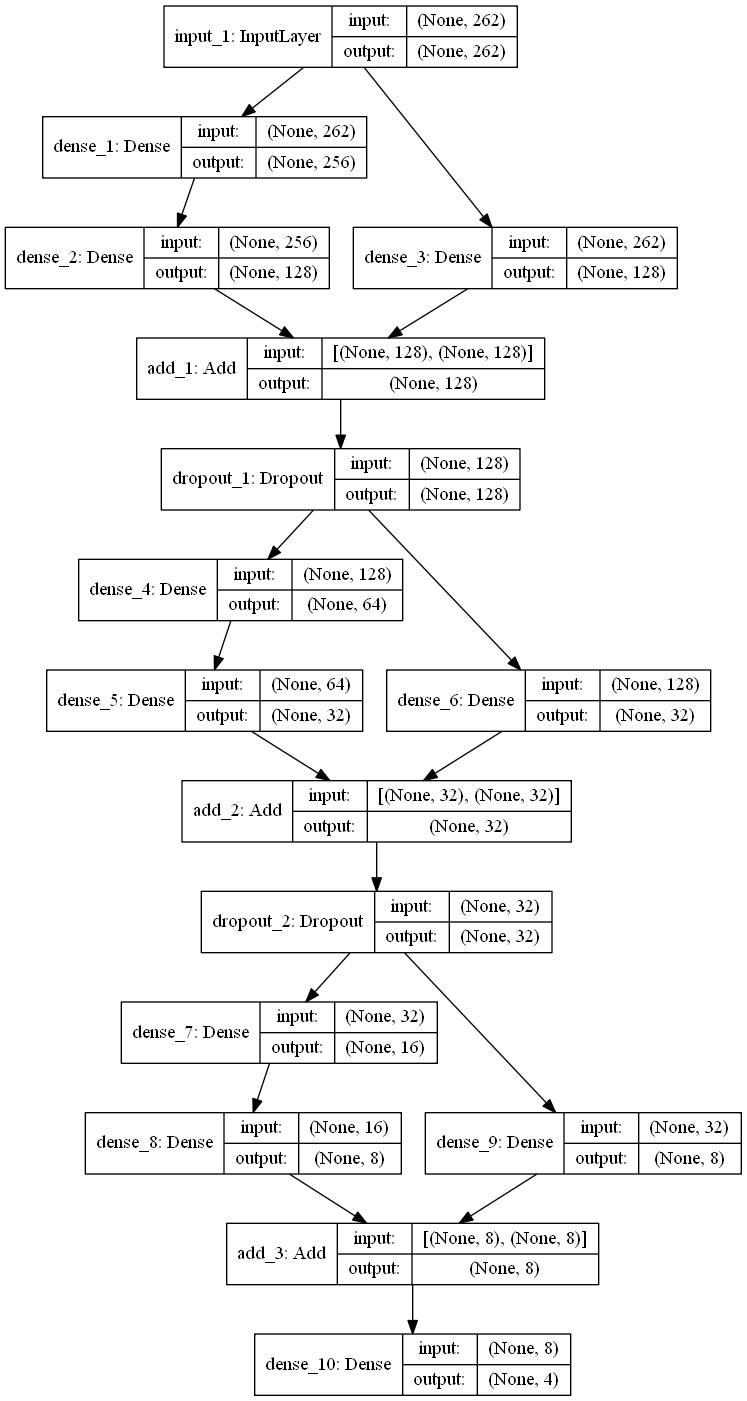

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_extra_all_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 residual ###
decoder_layer1 = autoencoder.layers[-13](decoded_input)
decoder_layer2 = autoencoder.layers[-12](decoder_layer1)
decoder_residual1 = autoencoder.layers[-11](decoded_input)
decoder_layer3 = autoencoder.layers[-10]([decoder_layer2, decoder_residual1])

### decoder 2 residual ###
decoder_layer4 = autoencoder.layers[-9](decoder_layer3)
decoder_layer5 = autoencoder.layers[-8](decoder_layer4)
decoder_residual2 = autoencoder.layers[-7](decoder_layer3)
decoder_layer6 = autoencoder.layers[-6]([decoder_layer5, decoder_residual2])

### decoder 3 residual ###
decoder_layer7 = autoencoder.layers[-5](decoder_layer6)
decoder_layer8 = autoencoder.layers[-4](decoder_layer7)
decoder_residual3 = autoencoder.layers[-3](decoder_layer6)
decoder_layer9 = autoencoder.layers[-2]([decoder_layer8, decoder_residual3])

### output ###
decoder_layer10 = autoencoder.layers[-1](decoder_layer9)


decoder = keras.Model(decoded_input, decoder_layer10)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 8)            40          input_2[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16)           144         dense_11[1][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 16)           80          input_2[0][0]                    
____________________________________________________________________________________________

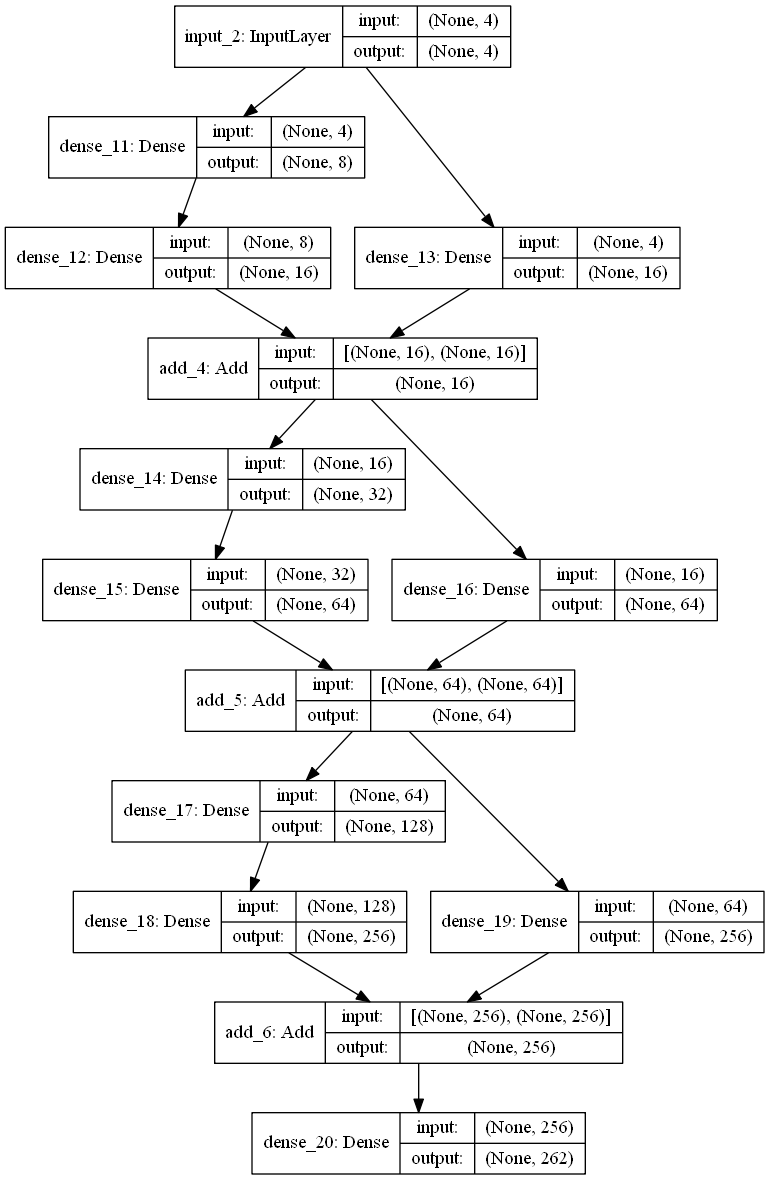

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_extra_all_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/residual_ae_extra_all_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2798 samples, validate on 932 samples
Epoch 1/300
2798/2798 [==============================] - 1s 401us/step - loss: 0.1757 - val_loss: 0.0373

Epoch 00001: saving model to ./trained_model/residual_ae_extra_all_v4-01-0.03733.h5
Epoch 2/300
2798/2798 [==============================] - 0s 114us/step - loss: 0.0353 - val_loss: 0.0329

Epoch 00002: saving model to ./trained_model/residual_ae_extra_all_v4-02-0.03290.h5
Epoch 3/300
2798/2798 [==============================] - 0s 106us/step - loss: 0.0334 - val_loss: 0.0322

Epoch 00003: saving model to ./trained_model/residual_ae_extra_all_v4-03-0.03220.h5
Epoch 4/300
2798/2798 [==============================] - 0s 106us/step - loss: 0.0326 - val_loss: 0.0312

Epoch 00004: saving model to ./trained_model/residual_ae_extra_all_v4-04-0.03121.h5
Epoch 5/300
2798/2798 [==============================] - 0s 103us/step - loss: 0.0312 - val_loss: 0.0296

Epoch 00005: saving model to ./trained_model/residual_ae_extra_all_v4-05-0.02962.h5
Epo

Epoch 44/300
2798/2798 [==============================] - 0s 113us/step - loss: 0.0123 - val_loss: 0.0159

Epoch 00044: saving model to ./trained_model/residual_ae_extra_all_v4-44-0.01592.h5
Epoch 45/300
2798/2798 [==============================] - 0s 111us/step - loss: 0.0121 - val_loss: 0.0164

Epoch 00045: saving model to ./trained_model/residual_ae_extra_all_v4-45-0.01643.h5
Epoch 46/300
2798/2798 [==============================] - 0s 108us/step - loss: 0.0118 - val_loss: 0.0162

Epoch 00046: saving model to ./trained_model/residual_ae_extra_all_v4-46-0.01622.h5
Epoch 47/300
2798/2798 [==============================] - 0s 110us/step - loss: 0.0118 - val_loss: 0.0160

Epoch 00047: saving model to ./trained_model/residual_ae_extra_all_v4-47-0.01601.h5
Epoch 48/300
2798/2798 [==============================] - 0s 105us/step - loss: 0.0117 - val_loss: 0.0161

Epoch 00048: saving model to ./trained_model/residual_ae_extra_all_v4-48-0.01613.h5
Epoch 49/300
2798/2798 [=====================

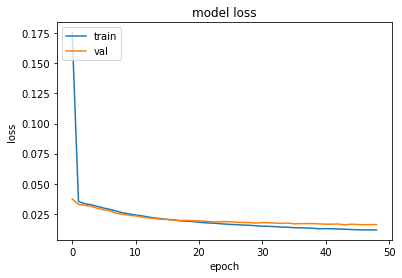

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_extra_all_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_extra_all_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[2.3566422 , 6.1746297 , 5.023724  , 1.8912241 ],
       [1.7280558 , 2.4908192 , 1.4812768 , 0.3093629 ],
       [0.569367  , 2.4113488 , 0.66978383, 2.9123569 ],
       ...,
       [3.0786812 , 0.95607716, 1.3385925 , 0.8364993 ],
       [7.7143564 , 5.5158367 , 1.5989786 , 2.919135  ],
       [1.8971393 , 2.6738284 , 1.905965  , 2.3248596 ]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3
count,932.000000,932.000000,932.000000,932.000000
mean,2.895975,2.609218,2.105618,2.327034
std,2.298572,1.915701,1.504213,1.887979
min,0.000000,0.000000,0.000000,0.000000
25%,1.013687,1.041188,1.038158,0.950745
50%,2.356642,2.367997,1.796286,1.891224
75%,4.234524,3.631943,3.099519,3.329271
max,10.596843,10.143229,6.450547,10.336407


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

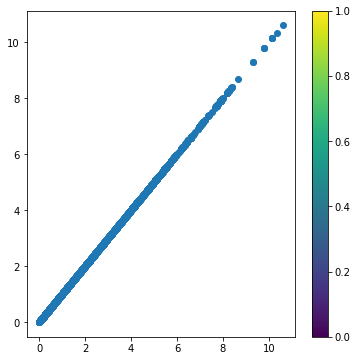

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[2.8596114e-06, 6.7678338e-09, 7.1031461e-21, ..., 1.2561322e-18,
        1.8292941e-10, 1.9390598e-18],
       [3.8599546e-07, 9.7084572e-05, 1.6728583e-08, ..., 5.1768815e-08,
        3.7214530e-04, 2.7720537e-07],
       [2.1986955e-06, 1.1537716e-03, 1.4628014e-03, ..., 5.8076557e-06,
        8.7866756e-06, 2.5597130e-04],
       ...,
       [1.8939711e-11, 4.1065933e-03, 3.1518340e-07, ..., 1.9968939e-08,
        1.5546579e-03, 6.7739334e-04],
       [1.7107791e-23, 2.6963713e-08, 2.9483413e-09, ..., 4.6154190e-17,
        2.1035078e-08, 7.3411571e-10],
       [1.2889892e-04, 4.1276228e-04, 3.4732661e-06, ..., 2.1245530e-06,
        2.2572875e-05, 2.8136697e-06]], dtype=float32)

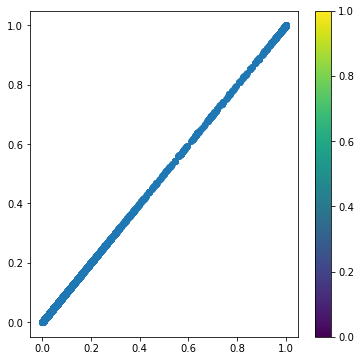

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[921,   0],
        [  1,  10]],

       [[930,   0],
        [  2,   0]],

       [[932,   0],
        [  0,   0]],

       ...,

       [[927,   0],
        [  5,   0]],

       [[921,   0],
        [ 11,   0]],

       [[929,   0],
        [  3,   0]]], dtype=int64)

In [31]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.398068669527897
precision :  0.9068627450980392
recall :  0.41918429003021146
f1 :  0.5733471074380165
hamming_loss :  0.0033826950168725223


In [32]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.398068669527897
precision :  0.5464949928469243
recall :  0.4784513590844063
f1 :  0.4984161046392806
hamming_loss :  0.0033826950168725223


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [34]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [35]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'